Auteur : Audrey Hohmann

# Projet P4 : Anticipez les besoins en consommation de bâtiments
 
## Mission : prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation

### Nettoyage, analyse exploratoire, 1er feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import missingno as msno
import geopandas as gpd
import folium
import mapclassify

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
from matplotlib import pyplot as plt

In [4]:
pd.options.mode.chained_assignment = None 

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv') 

In [7]:
df.shape

(3376, 46)

In [8]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [9]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [10]:
df.describe(include=np.number)

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [11]:
df.isna().mean().describe()

count    46.000000
mean      0.128477
std       0.300985
min       0.000000
25%       0.000000
50%       0.001925
75%       0.002666
max       1.000000
dtype: float64

In [12]:
df.isna().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.004739
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.002370
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.002666
LargestPropertyUseType             0.005924
LargestPropertyUseTypeGFA       

<AxesSubplot: >

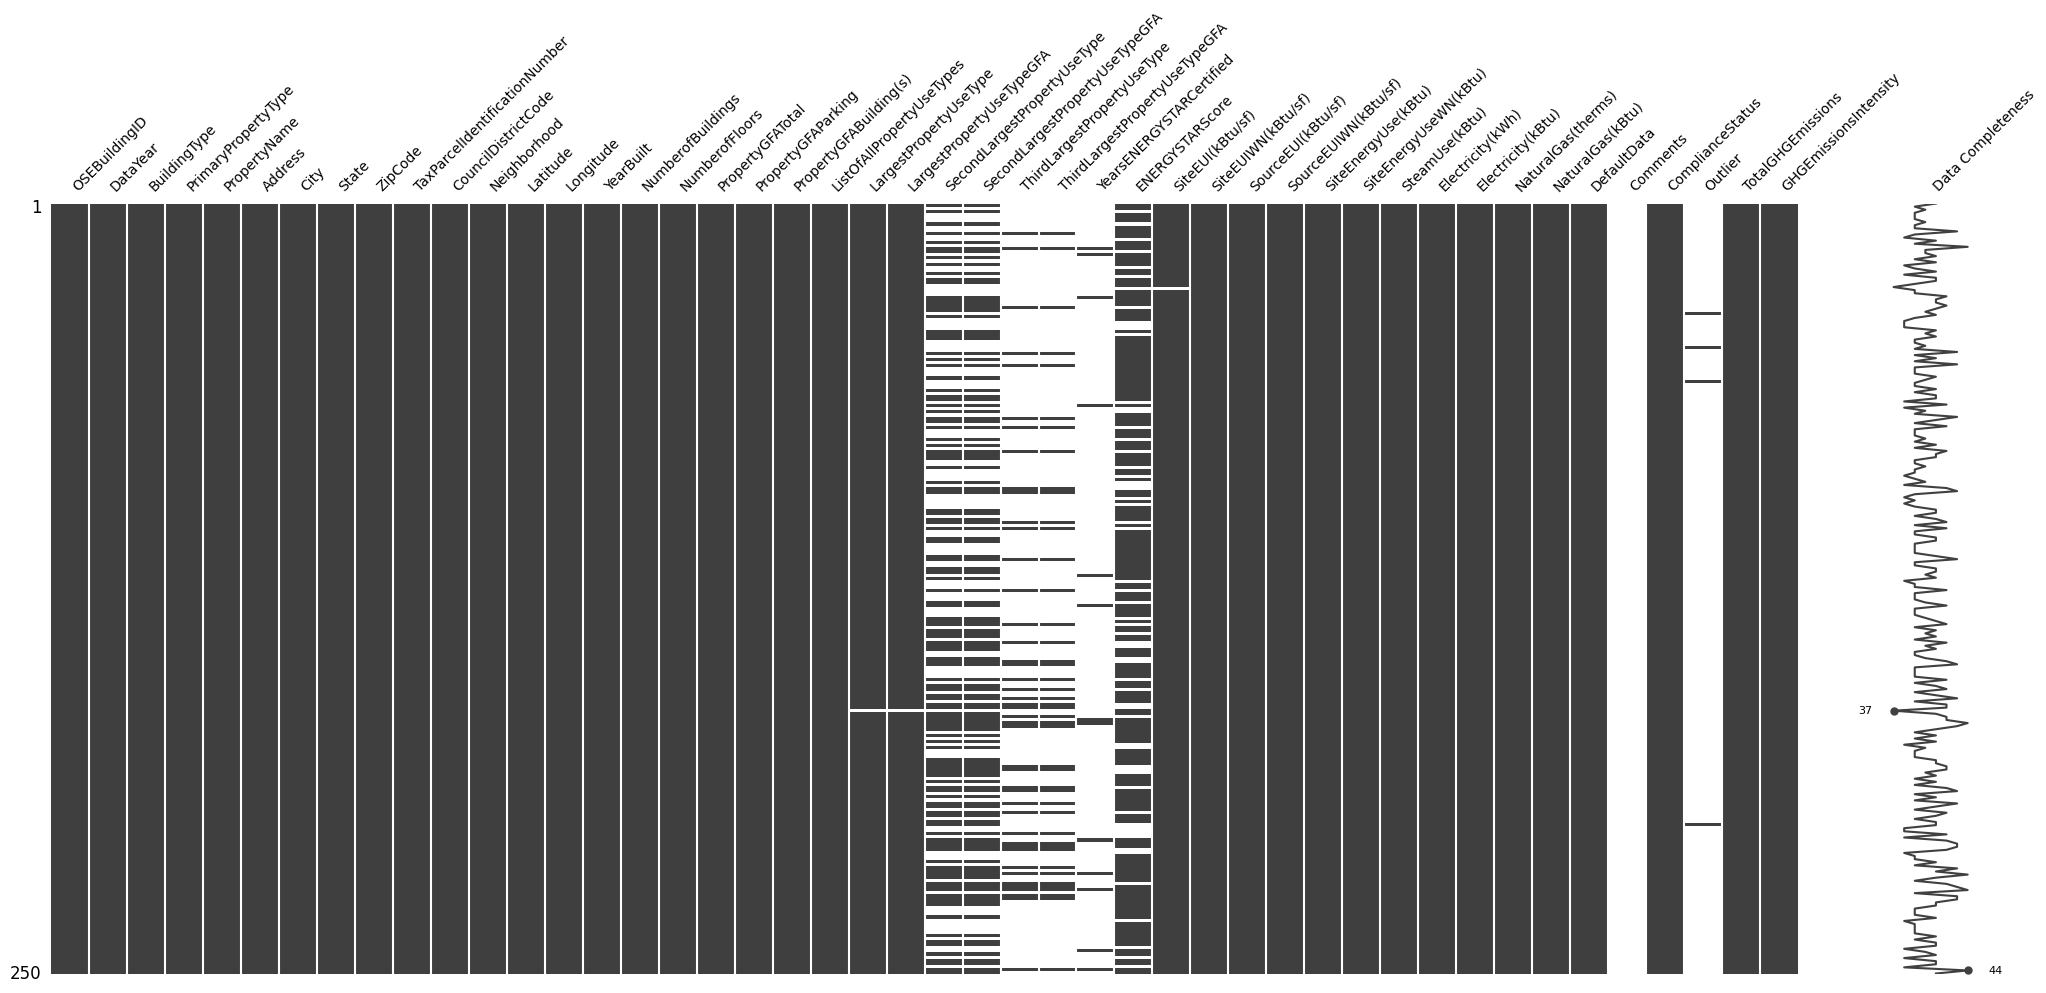

In [13]:
msno.matrix(df.sample(250), labels=True, fontsize=10)

In [14]:
df_nan_sub = df.loc[:,(df.isna().mean() < 0.50)]

## Analyse des types de bâtiments

In [15]:
df_nan_sub['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [16]:
df_nan_sub['PrimaryPropertyType'].nunique()

24

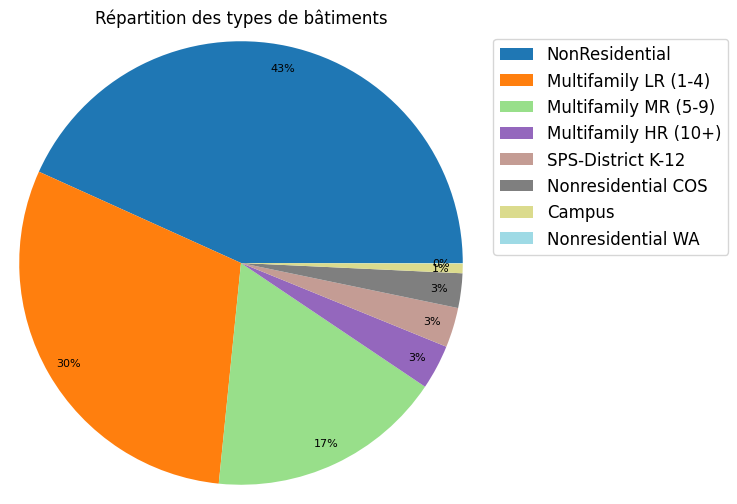

In [17]:
df1=df_nan_sub['BuildingType'].value_counts(normalize=True)
lab=df1.index.unique()
pie = df1.plot.pie(labels=None, figsize=(10,6), startangle=0, title="Répartition des types de bâtiments",
                   autopct='%1.0f%%', pctdistance=0.9, radius=1.2, colormap='tab20', fontsize=8)
pie.legend(lab, loc='lower center', bbox_to_anchor=(0.8, 0.5, 1, 1), fontsize=12)
pie.axes.get_yaxis().set_visible(False)
plt.show()

In [18]:
len(df_nan_sub[df_nan_sub['BuildingType'].isin(['Multifamily MR (5-9)', 'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)','Multifamily HR (10+)'])])

1830

In [19]:
dfNR=df_nan_sub[df_nan_sub['BuildingType'].isin(['NonResidential','Nonresidential COS','Nonresidential WA'])]

In [20]:
dfNR.shape

(1546, 39)

In [170]:
print(dfNR['BuildingType'].value_counts()) 
print(dfNR['BuildingType'].value_counts(normalize=True))

NonResidential        1460
Nonresidential COS      85
Nonresidential WA        1
Name: BuildingType, dtype: int64
NonResidential        0.944373
Nonresidential COS    0.054981
Nonresidential WA     0.000647
Name: BuildingType, dtype: float64


## Sélection des variables pertinentes pour l'analyse

In [21]:
#creation de la variable geometry pour analyse géographique
dfNR['geom'] = gpd.points_from_xy(dfNR['Longitude'], dfNR['Latitude'], crs="EPSG:4326")

In [22]:
dfNR.isna().mean()

OSEBuildingID                    0.000000
DataYear                         0.000000
BuildingType                     0.000000
PrimaryPropertyType              0.000000
PropertyName                     0.000000
Address                          0.000000
City                             0.000000
State                            0.000000
ZipCode                          0.010349
TaxParcelIdentificationNumber    0.000000
CouncilDistrictCode              0.000000
Neighborhood                     0.000000
Latitude                         0.000000
Longitude                        0.000000
YearBuilt                        0.000000
NumberofBuildings                0.001294
NumberofFloors                   0.000000
PropertyGFATotal                 0.000000
PropertyGFAParking               0.000000
PropertyGFABuilding(s)           0.000000
ListOfAllPropertyUseTypes        0.001294
LargestPropertyUseType           0.003881
LargestPropertyUseTypeGFA        0.003881
ENERGYSTARScore                  0

In [23]:
ls_sub=['OSEBuildingID','BuildingType', 'PrimaryPropertyType','PropertyGFATotal', 'PropertyGFAParking',  'PropertyGFABuilding(s)', 'Neighborhood','YearBuilt', 
        'NumberofBuildings','NumberofFloors', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
        'ENERGYSTARScore',
        'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
        'SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity', 'Longitude', 'Latitude','geom']

In [24]:
len(ls_sub)

25

In [25]:
dfsub = dfNR.filter(ls_sub)

In [26]:
dfsub.shape

(1546, 25)

## Suppression des doublons, des rapports non complets 

In [27]:
dfsub.duplicated(subset=['OSEBuildingID']).sum()

0

In [28]:
dfsub['ComplianceStatus'].unique()

array(['Compliant', 'Non-Compliant', 'Error - Correct Default Data',
       'Missing Data'], dtype=object)

In [29]:
dfsub=dfsub[dfsub['ComplianceStatus']=='Compliant']

In [30]:
dfsub.shape

(1514, 25)

## Nettoyage des valeurs manquantes

In [31]:
dfsub.isna().mean()

OSEBuildingID                0.000000
BuildingType                 0.000000
PrimaryPropertyType          0.000000
PropertyGFATotal             0.000000
PropertyGFAParking           0.000000
PropertyGFABuilding(s)       0.000000
Neighborhood                 0.000000
YearBuilt                    0.000000
NumberofBuildings            0.000000
NumberofFloors               0.000000
LargestPropertyUseType       0.002642
LargestPropertyUseTypeGFA    0.002642
ENERGYSTARScore              0.350066
SiteEnergyUse(kBtu)          0.000000
SteamUse(kBtu)               0.000000
Electricity(kBtu)            0.000000
NaturalGas(kBtu)             0.000000
ComplianceStatus             0.000000
SiteEnergyUseWN(kBtu)        0.000661
TotalGHGEmissions            0.000000
SiteEUIWN(kBtu/sf)           0.000661
GHGEmissionsIntensity        0.000000
Longitude                    0.000000
Latitude                     0.000000
geom                         0.000000
dtype: float64

### SiteEUIWN(kBtu/sf)

In [32]:
dfsub=dfsub[dfsub['SiteEUIWN(kBtu/sf)'].notna()]

In [33]:
dfsub.shape

(1513, 25)

### PrimaryPropertyType

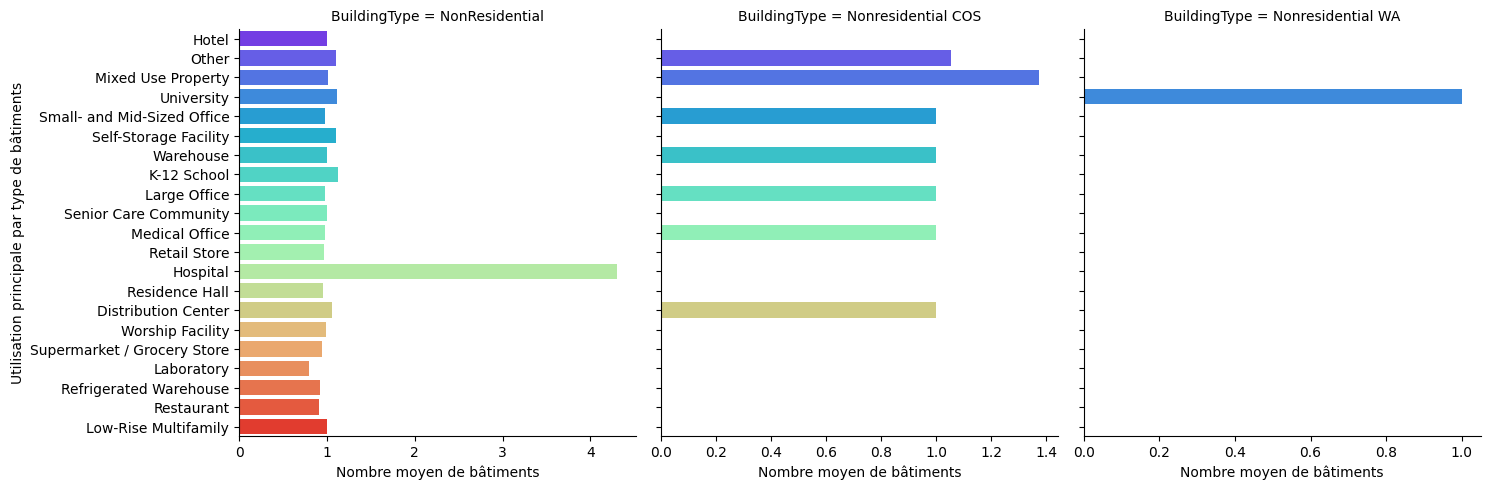

In [34]:
g1=sns.catplot(data=dfsub, y="PrimaryPropertyType", x="NumberofBuildings", col="BuildingType", kind="bar", col_wrap=3, errorbar=None, estimator="mean",
            palette="rainbow", aspect=1,sharex=False)
g1.set_axis_labels("Nombre moyen de bâtiments", "Utilisation principale par type de bâtiments")

plt.show()

In [35]:
dfsub= dfsub[(dfsub['PrimaryPropertyType'] != "Low-Rise Multifamily") & (dfsub['PrimaryPropertyType'] != "Residence Hall") & (dfsub['PrimaryPropertyType'] != "Senior Care Community")]

In [36]:
dfsub.shape

(1471, 25)

### LargestProperUseType

In [37]:
dfsub['LargestPropertyUseType'].nunique()

54

In [38]:
dfsub.loc[dfsub['LargestPropertyUseType'].isna()]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
353             496  NonResidential        Self-Storage Facility   
1147          21103  NonResidential                        Hotel   
2414          25568  NonResidential  Small- and Mid-Sized Office   
2459          25711  NonResidential                   Restaurant   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
353             111445                   0                  111445   
1147             61721                   0                   61721   
2414             48350                   0                   48350   
2459             28800                   0                   28800   

     Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
353       BALLARD       1946                2.0               2   
1147     DOWNTOWN       1910                1.0               8   
2414   LAKE UNION       2008                1.0               4   
2459     DOWNTOWN       1913                1.0               3   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
353                     NaN                        NaN              NaN   
1147                    NaN                        NaN             93.0   
2414                    NaN                        NaN             45.0   
2459                    NaN                        NaN              NaN   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
353          5.697472e+06             0.0          3007514.0   
1147         2.897080e+06             0.0          2534592.0   
2414         3.168131e+06             0.0          3168131.0   
2459         8.999242e+05             0.0           402907.0   

      NaturalGas(kBtu) ComplianceStatus  SiteEnergyUseWN(kBtu)  \
353          2689958.0        Compliant           6.076957e+06   
1147          362488.0        Compliant           2.968430e+06   
2414               0.0        Compliant           3.280956e+06   
2459          497017.0        Compliant           9.358332e+05   

      TotalGHGEmissions  SiteEUIWN(kBtu/sf)  GHGEmissionsIntensity  Longitude  \
353              163.83           51.000000                   1.47 -122.39310   
1147              36.92           53.500000                   0.60 -122.34165   
2414              22.09           74.699997                   0.46 -122.34086   
2459              29.21           32.500000                   1.01 -122.32474   

      Latitude                         geom  
353   47.66838  POINT (-122.39310 47.66838)  
1147  47.61203  POINT (-122.34165 47.61203)  
2414  47.64747  POINT (-122.34086 47.64747)  
2459  47.59697  POINT (-122.32474 47.59697)

In [39]:
dfsub['LargestPropertyUseType'] = dfsub['LargestPropertyUseType'].fillna(dfsub['PrimaryPropertyType'])

In [40]:
dfsub['LargestPropertyUseType'].isna().sum()

0

In [41]:
dfsub.loc[dfsub['LargestPropertyUseType'] == "Small- and Mid-Sized Office", 'LargestPropertyUseType']

2414    Small- and Mid-Sized Office
Name: LargestPropertyUseType, dtype: object

In [42]:
dfsub['LargestPropertyUseType'] = dfsub['LargestPropertyUseType'].replace(["Small- and Mid-Sized Office"], "Office")

In [43]:
dfsub['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'K-12 School', 'Other - Mall',
       'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Other/Specialty Hospital',
       'Financial Office', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other - Recreation', 'Lifestyle Center',
       'Other - P

### LargestPropertyUseTypeGFA 

In [44]:
dfsub['LargestPropertyUseTypeGFA'] = dfsub['LargestPropertyUseTypeGFA'].fillna(dfsub['PropertyGFABuilding(s)'])

In [45]:
dfsub['LargestPropertyUseTypeGFA'].isna().sum()

0

### Traitement des features nbre bâtiments et nbre étage

In [46]:
len(dfsub[dfsub['NumberofBuildings']==0])

51

In [47]:
dfsub.loc[(dfsub['NumberofBuildings']==0), ['NumberofBuildings']] = 1

In [48]:
dfsub.shape

(1471, 25)

In [49]:
data = dfsub.groupby(['NumberofBuildings', 'PrimaryPropertyType'])[['NumberofBuildings']].count()

In [50]:
data

NumberofBuildings
NumberofBuildings PrimaryPropertyType                           
1.0               Distribution Center                         51
                  Hospital                                     4
                  Hotel                                       73
                  K-12 School                                 36
                  Laboratory                                  10
                  Large Office                               166
                  Medical Office                              38
                  Mixed Use Property                         106
                  Other                                      223
                  Refrigerated Warehouse                      12
                  Restaurant                                  11
                  Retail Store                                85
                  Self-Storage Facility                       25
                  Small- and Mid-Sized Office                285
                  Supermarket / Grocery Store                 40
                  University                                  16
                  Warehouse                                  183
                  Worship Facility                            69
2.0               Distribution Center                          1
                  Hotel                                        2
                  Large Office                                 1
                  Medical Office                               1
                  Other                                        4
                  Self-Storage Facility                        3
                  University                                   2
3.0               Distribution Center                          1
                  K-12 School                                  1
                  Mixed Use Property                           1
                  Other                                        5
                  Warehouse                                    2
4.0               Hospital                                     1
                  K-12 School                                  1
5.0               Mixed Use Property                           2
                  Other                                        2
6.0               Hospital                                     2
                  Other                                        1
                  Small- and Mid-Sized Office                  1
7.0               Hospital                                     1
8.0               Hospital                                     1
                  Other                                        1
9.0               Hospital                                     1

In [51]:
data2 = dfsub.groupby(['NumberofFloors', 'PrimaryPropertyType'])[['NumberofFloors']].count()

In [52]:
data2.T

NumberofFloors         0                                           \
PrimaryPropertyType Hotel Medical Office Mixed Use Property Other   
NumberofFloors          1              3                  1     3   

NumberofFloors                                                             1   \
PrimaryPropertyType Small- and Mid-Sized Office Warehouse Distribution Center   
NumberofFloors                                1         1                  44   

NumberofFloors                                                        \
PrimaryPropertyType Hospital K-12 School Large Office Medical Office   
NumberofFloors             1           2            2              1   

NumberofFloors                                                       \
PrimaryPropertyType Mixed Use Property Other Refrigerated Warehouse   
NumberofFloors                      26    83                      9   

NumberofFloors                                                     \
PrimaryPropertyType Restaurant Retail Store Self-Storage Facility   
NumberofFloors               1           37                     4   

NumberofFloors                                                               \
PrimaryPropertyType Small- and Mid-Sized Office Supermarket / Grocery Store   
NumberofFloors                               24                          33   

NumberofFloors                                                             2   \
PrimaryPropertyType University Warehouse Worship Facility Distribution Center   
NumberofFloors               2       124               19                   6   

NumberofFloors                                                                \
PrimaryPropertyType Hotel K-12 School Laboratory Large Office Medical Office   
NumberofFloors          1          19          3            2              9   

NumberofFloors                                                       \
PrimaryPropertyType Mixed Use Property Other Refrigerated Warehouse   
NumberofFloors                      31    63                      3   

NumberofFloors                                                     \
PrimaryPropertyType Restaurant Retail Store Self-Storage Facility   
NumberofFloors               4           29                    11   

NumberofFloors                                                               \
PrimaryPropertyType Small- and Mid-Sized Office Supermarket / Grocery Store   
NumberofFloors                               68                           3   

NumberofFloors                                                             3   \
PrimaryPropertyType University Warehouse Worship Facility Distribution Center   
NumberofFloors               6        36               36                   1   

NumberofFloors                                                          \
PrimaryPropertyType Hospital Hotel K-12 School Laboratory Large Office   
NumberofFloors             1     5          13          1           10   

NumberofFloors                                                          \
PrimaryPropertyType Medical Office Mixed Use Property Other Restaurant   
NumberofFloors                   9                 17    37          5   

NumberofFloors                                          \
PrimaryPropertyType Retail Store Self-Storage Facility   
NumberofFloors                 9                     6   

NumberofFloors                                                               \
PrimaryPropertyType Small- and Mid-Sized Office Supermarket / Grocery Store   
NumberofFloors                               86                           1   

NumberofFloors                                                             4   \
PrimaryPropertyType University Warehouse Worship Facility Distribution Center   
NumberofFloors               5         8               12                   1   

NumberofFloors                                                                \
PrimaryPropertyType Hotel K-12 School Laboratory Large Office Medical Office   
NumberofFloors     

In [53]:
dfsub.loc[dfsub['NumberofFloors'] == 99]

OSEBuildingID    BuildingType PrimaryPropertyType  PropertyGFATotal  \
1359          21611  NonResidential    Worship Facility             21948   

      PropertyGFAParking  PropertyGFABuilding(s)      Neighborhood  YearBuilt  \
1359                   0                   21948  GREATER DUWAMISH       1977   

      NumberofBuildings  NumberofFloors LargestPropertyUseType  \
1359                1.0              99       Worship Facility   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
1359                    21948.0             80.0          326001.1875   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  \
1359             0.0           326001.0               0.0        Compliant   

      SiteEnergyUseWN(kBtu)  TotalGHGEmissions  SiteEUIWN(kBtu/sf)  \
1359            326001.1875               2.27                14.9   

      GHGEmissionsIntensity  Longitude  Latitude                         geom  
1359                    0.1 -122.30265  47.55072  POINT (-122.30265 47.55072)

In [54]:
sns.relplot(data=dfsub, x="SiteEUIWN(kBtu/sf)", y='NumberofFloors', hue="PrimaryPropertyType", aspect=2)
plt.show()

In [55]:
dfsub = dfsub.drop((dfsub.loc[dfsub['NumberofFloors'] == 99]).index)

In [56]:
dfsub.shape

(1470, 25)

In [57]:
len(dfsub.loc[((dfsub['PropertyGFAParking'] + dfsub['PropertyGFABuilding(s)'])!= dfsub['PropertyGFATotal']), 'PropertyGFATotal'])

0

## Analyse de la variable quartier 

In [58]:
dfsub['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'MAGNOLIA / QUEEN ANNE', 'CENTRAL',
       'SOUTHEAST', 'NORTH', 'DELRIDGE', 'SOUTHWEST', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [59]:
dfsub['Neighborhood_lcaps'] = dfsub['Neighborhood'].map(lambda x : x.lower() if type(x) is str else x)

In [60]:
dfsub[['Neighborhood', 'Neighborhood_lcaps']].sample(10)

Neighborhood     Neighborhood_lcaps
1943                  NORTH                  north
2381  MAGNOLIA / QUEEN ANNE  magnolia / queen anne
378                 BALLARD                ballard
1755                   EAST                   east
3076                Ballard                ballard
732                DOWNTOWN               downtown
2686               DOWNTOWN               downtown
2041       GREATER DUWAMISH       greater duwamish
640        GREATER DUWAMISH       greater duwamish
526                DOWNTOWN               downtown

In [61]:
dfsub['Neighborhood_lcaps'].replace(to_replace="delridge neighborhoods", value="delridge", inplace=True)

In [62]:
gdf = gpd.GeoDataFrame(dfsub, geometry="geom", crs="EPSG:4326")

In [128]:
map = folium.Map(location=[47.624033, -122.334795], tiles="OpenStreetMap", zoom_start=11, width=1000, height=1000)
# mycolor=mpl.colors.ListedColormap("red")
m1 = gdf.explore(m=map, column="Neighborhood_lcaps", cmap='tab20', color='red', marker_kwds=dict(radius=2, fill=True), tooltip=True, legend_kwds=dict(caption='Quartier'))
folium.LayerControl().add_to(m1)
m1

## Analyse des corrélations linéaires

In [64]:
corr = dfsub.select_dtypes(include=np.number).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':6}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontsize=28)
plt.show()

g=sns.pairplot(dfsub,corner=True)
g.fig.suptitle("Analyses bivariées des variables quantitatives", x=0.5, y=0.9, fontsize=28)
plt.show()

## Analyse des targets

In [65]:
dfsub.describe(include=np.number)

OSEBuildingID  PropertyGFATotal  PropertyGFAParking  \
count    1470.000000      1.470000e+03         1470.000000   
mean    16251.502041      1.126308e+05        14188.444898   
std     13729.516195      1.921897e+05        44484.460680   
min         1.000000      1.128500e+04            0.000000   
25%       600.250000      2.880000e+04            0.000000   
50%     21147.500000      4.730250e+04            0.000000   
75%     24588.500000      1.029090e+05            0.000000   
max     50226.000000      1.952220e+06       512608.000000   

       PropertyGFABuilding(s)    YearBuilt  NumberofBuildings  NumberofFloors  \
count            1.470000e+03  1470.000000        1470.000000     1470.000000   
mean             9.844235e+04  1961.272789           1.070748        4.261224   
std              1.677568e+05    32.825421           0.538916        6.463159   
min              1.092500e+04  1900.000000           1.000000        0.000000   
25%              2.779100e+04  1929.000000           1.000000        1.000000   
50%              4.538550e+04  1965.000000           1.000000        2.000000   
75%              9.342125e+04  1988.000000           1.000000        4.000000   
max              1.765970e+06  2015.000000           9.000000       76.000000   

       LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
count               1.470000e+03       944.000000         1.470000e+03   
mean                9.057003e+04        63.593220         7.741833e+06   
std                 1.562844e+05        28.649263         1.901125e+07   
min                 5.656000e+03         1.000000         5.713320e+04   
25%                 2.496325e+04        43.750000         1.217660e+06   
50%                 4.129150e+04        70.000000         2.617531e+06   
75%                 8.864600e+04        88.000000         6.991989e+06   
max                 1.680937e+06       100.000000         2.930908e+08   

       SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
count    1.470000e+03       1.470000e+03      1.470000e+03   
mean     5.161892e+05       5.532165e+06      1.645805e+06   
std      5.436451e+06       1.328134e+07      5.545137e+06   
min      0.000000e+00      -1.154170e+05      0.000000e+00   
25%      0.000000e+00       7.226602e+05      0.000000e+00   
50%      0.000000e+00       1.649312e+06      4.298050e+05   
75%      0.000000e+00       5.134931e+06      1.396866e+06   
max      1.349435e+08       2.745325e+08      1.381912e+08   

       SiteEnergyUseWN(kBtu)  TotalGHGEmissions  SiteEUIWN(kBtu/sf)  \
count           1.470000e+03        1470.000000         1470.000000   
mean            7.842168e+06         165.819279           77.099388   
std             1.916546e+07         581.959942           76.909160   
min             0.000000e+00          -0.800000            0.000000   
25%             1.287964e+06          19.812500           36.825000   
50%             2.749243e+06          47.880000           55.900002   
75%             7.198460e+06         134.660000           87.300003   
max             2.966717e+08       12307.160000          834.400024   

       GHGEmissionsIntensity    Longitude     Latitude  
count            1470.000000  1470.000000  1470.000000  
mean                1.606619  -122.333882    47.615807  
std                 2.246670     0.023057     0.046553  
min                -0.020000  -122.411820    47.509590  
25%                 0.350000  -122.342915    47.587270  
50%                 0.850000  -122.333270    47.612350  
75%                 1.910000  -122.323257    47.647690  
max                25.710000  -122.261800    47.733870

In [66]:
f, axs = plt.subplots(1, 4, figsize=(8, 5))
sns.boxplot(data=dfsub, y="SiteEnergyUseWN(kBtu)", showmeans=True, meanprops={'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}, ax=axs[0])
sns.boxplot(data=dfsub, y="SiteEUIWN(kBtu/sf)", showmeans=True, meanprops={'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}, ax=axs[1])
sns.boxplot(data=dfsub, y="TotalGHGEmissions", showmeans=True, meanprops={'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}, ax=axs[2])
sns.boxplot(data=dfsub, y="GHGEmissionsIntensity", showmeans=True, meanprops={'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}, ax=axs[3])
f.tight_layout()

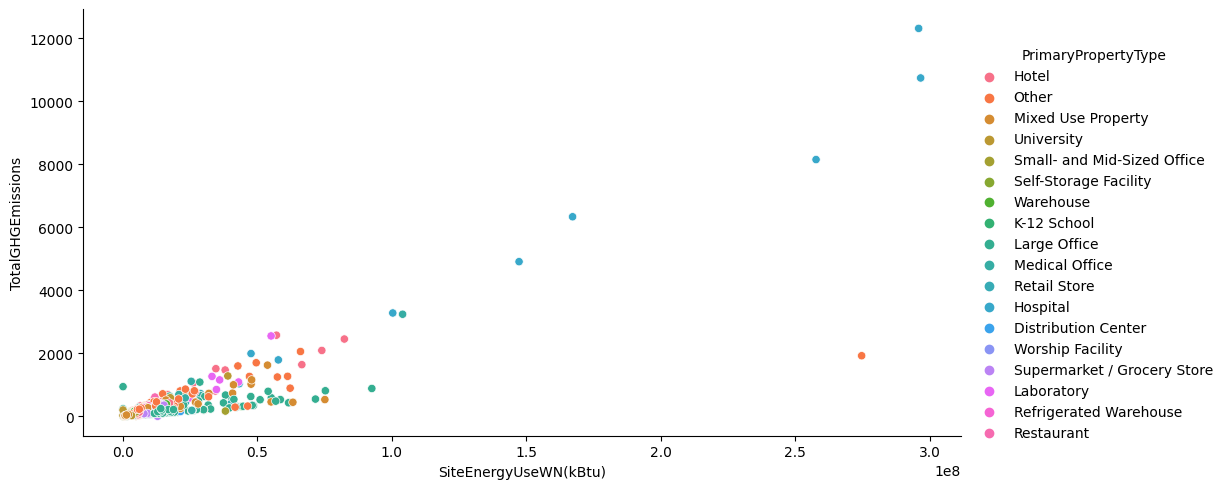

In [67]:
sns.relplot(data=dfsub, x="SiteEnergyUseWN(kBtu)", y="TotalGHGEmissions", hue="PrimaryPropertyType", aspect=2)
plt.show()

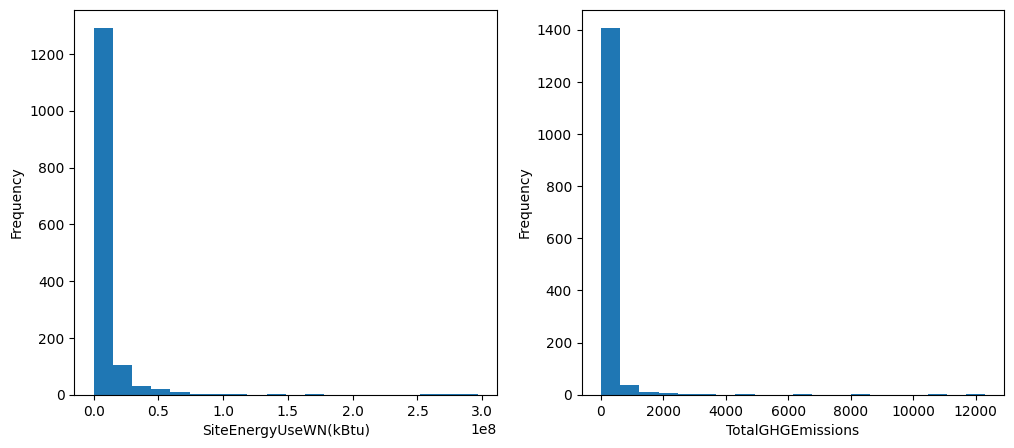

In [68]:
f, axs = plt.subplots(1, 2, figsize=(12, 5))
(dfsub["SiteEnergyUseWN(kBtu)"].plot(kind='hist', bins=20, ax=axs[0])
                         .set(xlabel="SiteEnergyUseWN(kBtu)"))

(dfsub["TotalGHGEmissions"].plot(kind='hist', bins=20, ax=axs[1])
                            .set(xlabel="TotalGHGEmissions"))

plt.show()

In [69]:
print("SiteEnergyUseWN(kBtu), valeur skew :", dfsub['SiteEnergyUseWN(kBtu)'].skew(),  "et valeur kurtosis", dfsub['SiteEnergyUseWN(kBtu)'].kurtosis())
print("TotalGHGEmissions, valeur skew :", dfsub['TotalGHGEmissions'].skew(),  "et valeur kurtosis", dfsub['TotalGHGEmissions'].kurtosis())

SiteEnergyUseWN(kBtu), valeur skew : 9.40981902940857 et valeur kurtosis 120.32677987315475
TotalGHGEmissions, valeur skew : 13.779714760216871 et valeur kurtosis 238.84234319024222


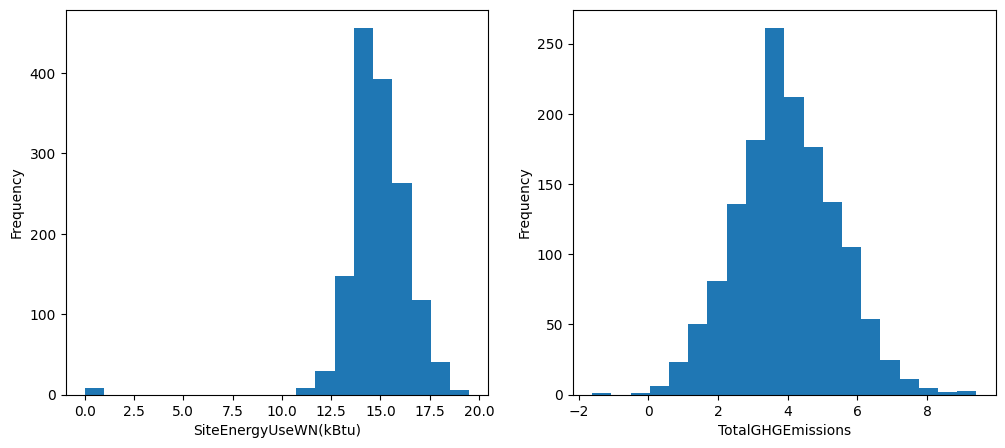

In [70]:
f, axs = plt.subplots(1, 2, figsize=(12, 5))
(np.log(dfsub['SiteEnergyUseWN(kBtu)'] + 1).plot(kind='hist', bins=20, ax=axs[0])
                         .set(xlabel='SiteEnergyUseWN(kBtu)'))

(np.log(dfsub['TotalGHGEmissions'] + 1).plot(kind='hist', bins=20, ax=axs[1])
                            .set(xlabel='TotalGHGEmissions'))

plt.show()

### Usage premier / conso d'énergie

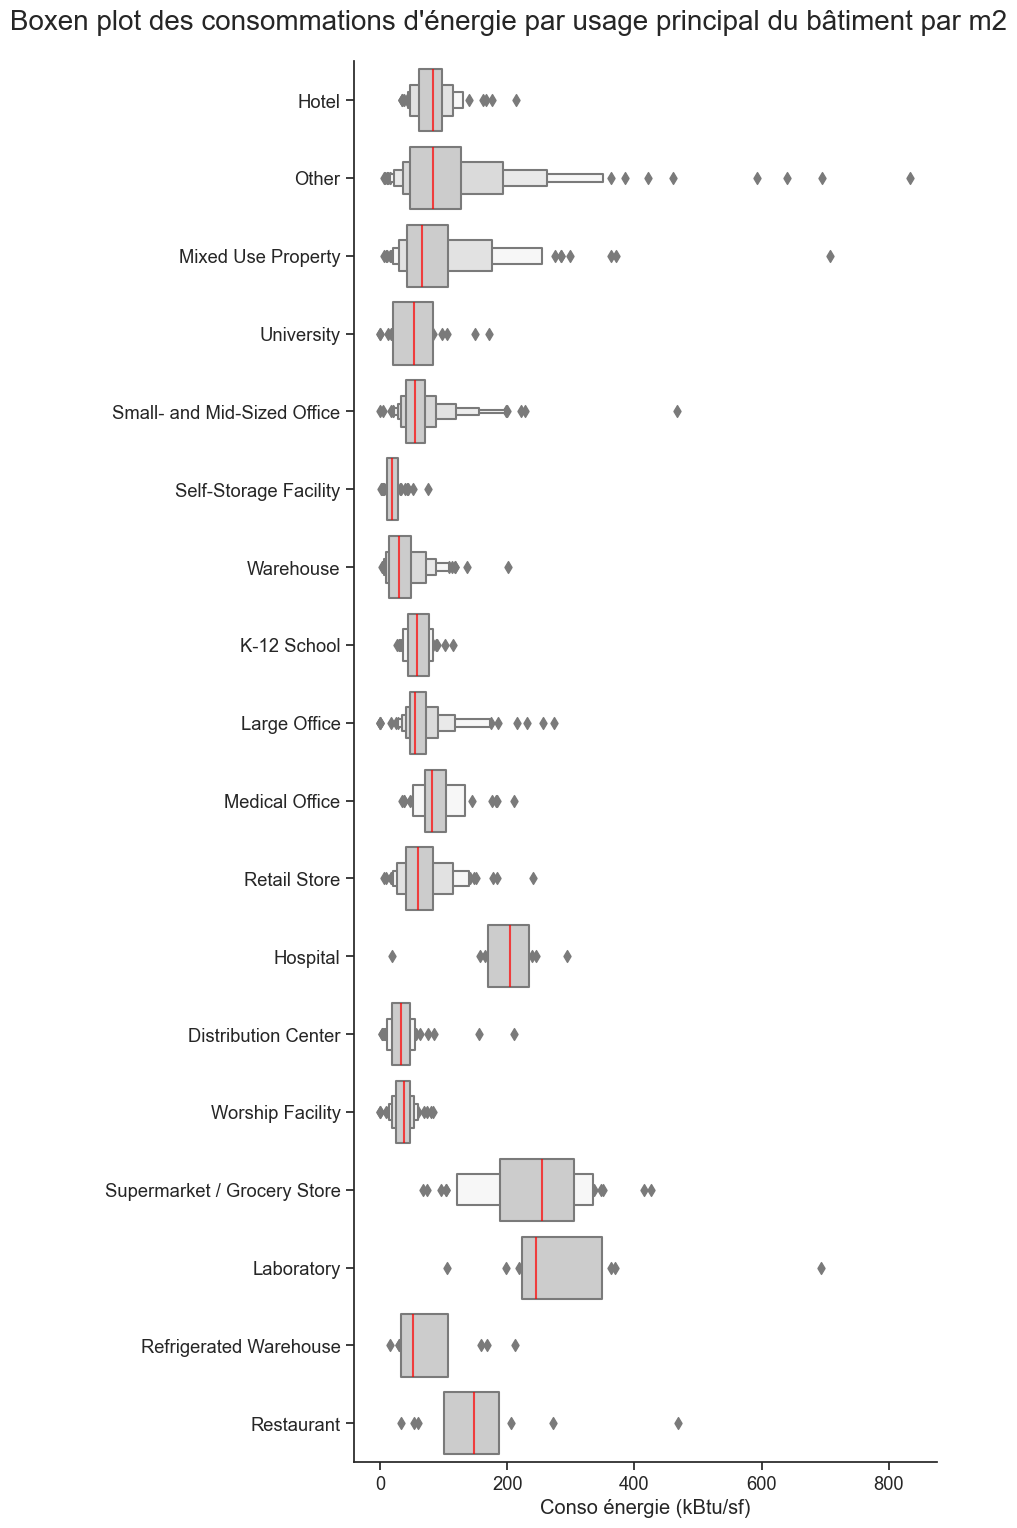

In [71]:
g2 = sns.set_theme(style="ticks", font='sans-serif', font_scale=1.2)
g2 = sns.catplot(data=dfsub,  x="SiteEUIWN(kBtu/sf)", y="PrimaryPropertyType", kind="boxen", color='0.8', 
                height=15, aspect=0.6, line_kws=dict(color="red", alpha=0.7))
#g.fig.subplots_adjust(top=0.1)
g2.fig.suptitle("Boxen plot des consommations d'énergie par usage principal du bâtiment par m2", x=0.5, y=1.02, fontsize=20)
g2.set_axis_labels('Conso énergie (kBtu/sf)', "")
plt.show()
#g2.savefig('name.png')

Calcul du rapport de corrélation eta carré ou eta squared η2Y/X=Vinterclasses/Vtotale :

Si η2Y/X=0 , cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre les variables Y et X.

Au contraire, si η2Y/X=1 , cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les variables Y et X.

In [72]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [73]:
eta_squared(dfsub["PrimaryPropertyType"], dfsub["SiteEUIWN(kBtu/sf)"])

0.32125773072447084

In [130]:
# affichage cartographique des bâtiments classés par consommation d'energie

map = folium.Map(location=[47.624033, -122.334795], tiles="OpenStreetMap", zoom_start=11, width=1000, height=1000)
# mycolor=mpl.colors.ListedColormap("red")
m = gdf.explore(m=map, column="SiteEUIWN(kBtu/sf)", cmap='hot_r', color='red', scheme='FisherJenks', marker_kwds=dict(radius=2, fill=True), tooltip=True)
folium.LayerControl().add_to(m)
m

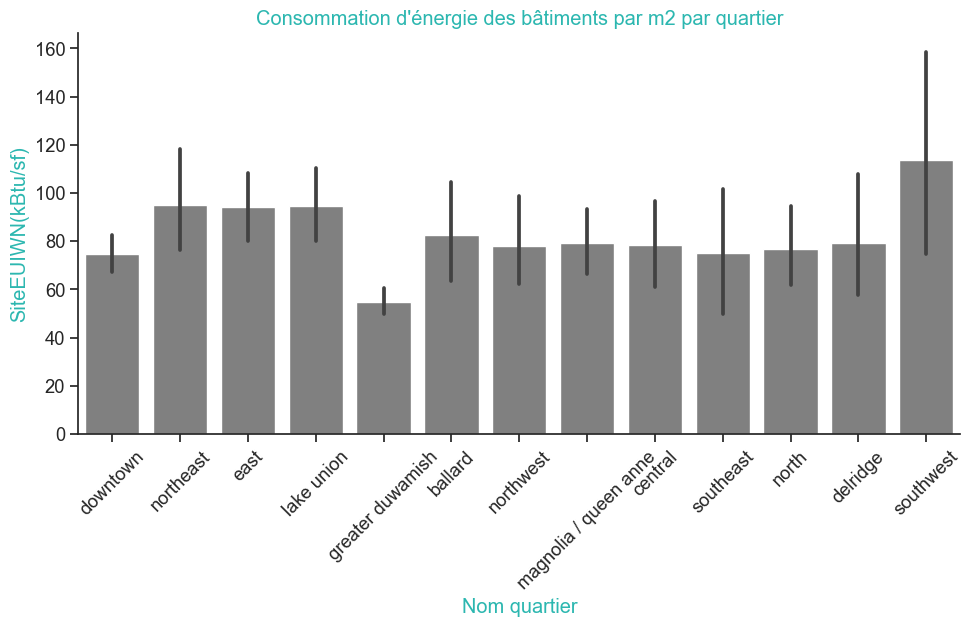

In [75]:
g = sns.catplot(data=dfsub, kind="bar", y="SiteEUIWN(kBtu/sf)", x="Neighborhood_lcaps", color="grey", errorbar=('ci', 95), aspect=2)
plt.title("Consommation d'énergie des bâtiments par m2 par quartier", color='#2cb7b0')
g.set_axis_labels("Nom quartier", "SiteEUIWN(kBtu/sf)", color='#2cb7b0')
g.set_xticklabels(rotation=45)
plt.show()

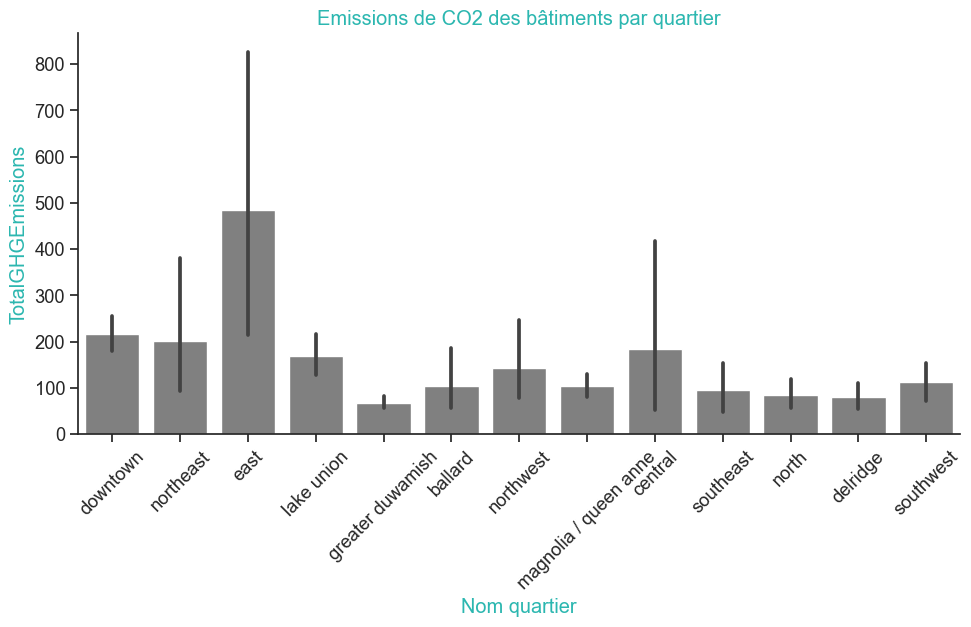

In [76]:
g = sns.catplot(data=dfsub, kind="bar", y="TotalGHGEmissions", x="Neighborhood_lcaps", color="grey", errorbar=('ci', 95), aspect=2)
plt.title("Emissions de CO2 des bâtiments par quartier", color='#2cb7b0')
g.set_axis_labels("Nom quartier", "TotalGHGEmissions", color='#2cb7b0')
g.set_xticklabels(rotation=45)
plt.show()

In [149]:
# affichage cartographique des bâtiments classés par émissions Co2

map = folium.Map(location=[47.624033, -122.334795], tiles="CartoDBPositron", zoom_start=11, width=1000, height=1000)
# mycolor=mpl.colors.ListedColormap("red")
m = gdf.explore(m=map, column="TotalGHGEmissions", cmap='RdYlGn_r', color='red', scheme='FisherJenks', marker_kwds=dict(radius=5, fill=True), tooltip=True, style_kwds=dict(opacity=1))
folium.LayerControl().add_to(m)
m

### Usage premier / conso énergie / surface 

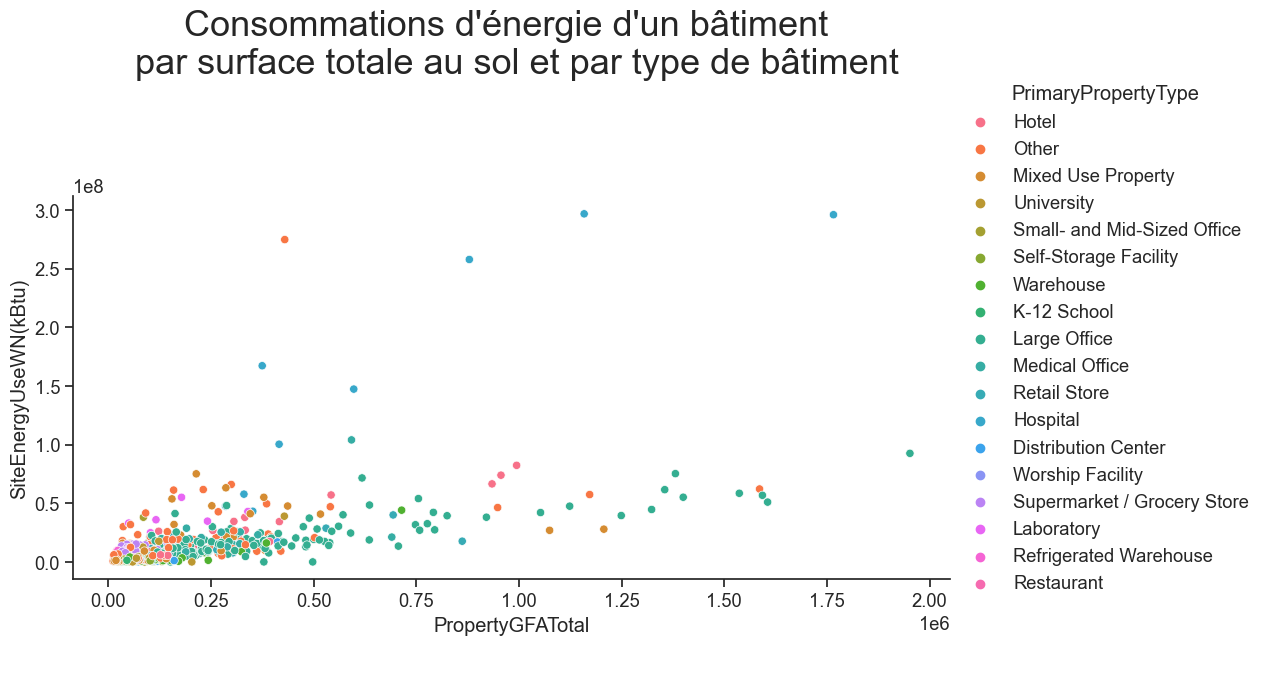

In [131]:
g1 = sns.set_theme(style="ticks", font='sans-serif', font_scale=1.2)
g1=sns.relplot(data = dfsub, x='PropertyGFATotal', y="SiteEnergyUseWN(kBtu)", hue="PrimaryPropertyType", aspect=2)
plt.title(f"Consommations d'énergie d'un bâtiment \n par surface totale au sol et par type de bâtiment\n", x=0.5, y=1.2, fontsize=26)
plt.show()

## Nettoyage des outliers

### Target SiteEnergyUseWN(kBtu) and TotalGHGEmissions

In [78]:
cols = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

Q1 = dfsub[cols].quantile(0.25)
Q3 = dfsub[cols].quantile(0.75)
IQR = Q3 - Q1

dfwoutlier = dfsub[~((dfsub[cols] < (Q1 - 1.5 * IQR)) |(dfsub[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

dfwoutlier.head()
dfwoutlier.shape

(1254, 26)

In [79]:
dfwoutlier.describe(include=np.number)

OSEBuildingID  PropertyGFATotal  PropertyGFAParking  \
count    1254.000000       1254.000000         1254.000000   
mean    17679.418660      66001.557416         8052.574960   
std     12943.188641      69955.464063        27685.177036   
min         1.000000      11285.000000            0.000000   
25%       723.500000      27000.000000            0.000000   
50%     21464.500000      40757.500000            0.000000   
75%     24710.750000      73383.000000            0.000000   
max     50226.000000     706176.000000       335109.000000   

       PropertyGFABuilding(s)    YearBuilt  NumberofBuildings  NumberofFloors  \
count             1254.000000  1254.000000        1254.000000     1254.000000   
mean             57948.982456  1958.940989           1.043860        2.962520   
std              54557.304700    32.631778           0.355762        2.611173   
min              10925.000000  1900.000000           1.000000        0.000000   
25%              26212.500000  1928.000000           1.000000        1.000000   
50%              39075.500000  1962.000000           1.000000        2.000000   
75%              66581.750000  1985.000000           1.000000        4.000000   
max             706176.000000  2015.000000           6.000000       24.000000   

       LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
count                1254.000000       801.000000         1.254000e+03   
mean                53460.751994        64.215980         3.272359e+06   
std                 51921.002240        28.397219         3.418094e+06   
min                  5656.000000         1.000000         5.713320e+04   
25%                 23450.750000        46.000000         1.079107e+06   
50%                 35244.500000        71.000000         2.056245e+06   
75%                 61707.000000        88.000000         4.380987e+06   
max                432903.000000       100.000000         5.116831e+07   

       SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
count    1.254000e+03       1.254000e+03      1.254000e+03   
mean     4.896942e+04       2.407281e+06      7.818469e+05   
std      2.900624e+05       2.876699e+06      1.079967e+06   
min      0.000000e+00      -1.154170e+05      0.000000e+00   
25%      0.000000e+00       6.266210e+05      0.000000e+00   
50%      0.000000e+00       1.299154e+06      3.620735e+05   
75%      0.000000e+00       3.039908e+06      1.048710e+06   
max      3.480881e+06       2.861461e+07      5.490664e+06   

       SiteEnergyUseWN(kBtu)  TotalGHGEmissions  SiteEUIWN(kBtu/sf)  \
count           1.254000e+03        1254.000000         1254.000000   
mean            3.327934e+06          62.085957           63.923046   
std             3.128590e+06          65.944321           52.368607   
min             0.000000e+00          -0.800000            0.000000   
25%             1.163740e+06          16.705000           33.825000   
50%             2.150681e+06          38.385000           52.200001   
75%             4.515240e+06          82.042500           75.875002   
max             1.604129e+07         306.500000          460.100006   

       GHGEmissionsIntensity    Longitude     Latitude  
count            1254.000000  1254.000000  1254.000000  
mean                1.282065  -122.333908    47.615441  
std                 1.604058     0.023597     0.048681  
min                -0.020000  -122.411820    47.509590  
25%                 0.320000  -122.343995    47.582520  
50%                 0.750000  -122.332855    47.612330  
75%                 1.570000  -122.322515    47.649757  
max                16.990000  -122.261800    47.733870

In [80]:
#on enlève 7 bâtiments avec des consommations d'énergie < = à 0
dfwoutlier = dfwoutlier[~((dfwoutlier['SiteEnergyUseWN(kBtu)']<=0)|(dfwoutlier['SiteEUIWN(kBtu/sf)']<=0))]

In [81]:
dfwoutlier.shape

(1247, 26)

In [82]:
#on enlève 2 bâtiments avec des émissions <= 0 
dfwoutlier = dfwoutlier[~((dfwoutlier['TotalGHGEmissions']<=0)|(dfwoutlier['GHGEmissionsIntensity']<=0))]

In [83]:
dfwoutlier.shape

(1245, 26)

In [136]:
dfwoutlier['SiteEnergyUse(kBtu)'].describe()

count    1.245000e+03
mean     3.210540e+06
std      3.063053e+06
min      5.713320e+04
25%      1.078536e+06
50%      2.050601e+06
75%      4.345698e+06
max      1.572558e+07
Name: SiteEnergyUse(kBtu), dtype: float64

In [137]:
dfwoutlier['TotalGHGEmissions'].describe()

count    1245.000000
mean       61.948442
std        65.683883
min         0.400000
25%        16.670000
50%        38.480000
75%        81.960000
max       306.500000
Name: TotalGHGEmissions, dtype: float64

## Création de nouvelles variables

In [84]:
#calcul du pourcentage de surface de parking sur la surface totale GFA
dfwoutlier['proportionparking'] = (dfwoutlier['PropertyGFAParking']/dfwoutlier['PropertyGFATotal'])

In [85]:
#calcul du pourcentage de surface de bâtiments sur la surface totale GFA
dfwoutlier['Proportionbat'] = (dfwoutlier['PropertyGFABuilding(s)']/dfwoutlier['PropertyGFATotal'])

In [86]:
# calcul de la moyenne de surface par étage
dfwoutlier['mean_GFA_per_floor'] = dfwoutlier['PropertyGFABuilding(s)'] / (dfwoutlier['NumberofFloors'] + 1)

In [87]:
#calcul du pourcentage de surface occupée de la feature LargestPropertyUseType 
dfwoutlier['prop_gfa_largest_property'] = dfwoutlier['LargestPropertyUseTypeGFA'] / dfwoutlier['PropertyGFATotal']

In [88]:
df_stats = dfwoutlier.groupby('LargestPropertyUseType')['prop_gfa_largest_property'].mean().reset_index(drop=False)

In [89]:
df_stats.columns = ['LargestPropertyUseType', 'prop_gfa_largest_property_per_type']

In [90]:
dfwoutlier = dfwoutlier.merge(df_stats, on='LargestPropertyUseType', how='left')

In [91]:
# calcul de la différence en % de la surface moyenne par type d'utilisation et la surface de l'utilisation type observée
dfwoutlier['diff_prop_gfa_largest_property_per_type'] \
= dfwoutlier['prop_gfa_largest_property'] - dfwoutlier['prop_gfa_largest_property_per_type']

In [92]:
dfwoutlier.head()

OSEBuildingID        BuildingType PrimaryPropertyType  PropertyGFATotal  \
0              1      NonResidential               Hotel             88434   
1              2      NonResidential               Hotel            103566   
2              5      NonResidential               Hotel             61320   
3              9  Nonresidential COS               Other             97288   
4             10      NonResidential               Hotel             83008   

   PropertyGFAParking  PropertyGFABuilding(s) Neighborhood  YearBuilt  \
0                   0                   88434     DOWNTOWN       1927   
1               15064                   88502     DOWNTOWN       1996   
2                   0                   61320     DOWNTOWN       1926   
3               37198                   60090     DOWNTOWN       1999   
4                   0                   83008     DOWNTOWN       1926   

   NumberofBuildings  NumberofFloors LargestPropertyUseType  \
0                1.0              12                  Hotel   
1                1.0              11                  Hotel   
2                1.0              10                  Hotel   
3                1.0               2         Police Station   
4                1.0              11                  Hotel   

   LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                    88434.0             60.0            7226362.5   
1                    83880.0             61.0            8387933.0   
2                    61320.0             56.0            6794584.0   
3                    88830.0              NaN           12086616.0   
4                    81352.0             27.0            5758795.0   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  \
0      2003882.00          3946027.0         1276453.0        Compliant   
1            0.00          3242851.0         5145082.0        Compliant   
2      2214446.25          2768924.0         1811213.0        Compliant   
3            0.00          7371434.0         4715182.0        Compliant   
4            0.00          2811215.0         2947580.0        Compliant   

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  SiteEUIWN(kBtu/sf)  \
0              7456910.0             249.98           84.300003   
1              8664479.0             295.86           97.900002   
2              6946800.5             286.43          113.300003   
3             12581712.0             301.81          141.600006   
4              6062767.5             176.14           74.500000   

   GHGEmissionsIntensity  Longitude  Latitude                         geom  \
0                   2.83 -122.33799  47.61220  POINT (-122.33799 47.61220)   
1                   2.86 -122.33393  47.61317  POINT (-122.33393 47.61317)   
2                   4.67 -122.33664  47.61412  POINT (-122.33664 47.61412)   
3                   3.10 -122.33657  47.61623  POINT (-122.33657 47.61623)   
4                   2.12 -122.33283  47.61390  POINT (-122.33283 47.61390)   

  Neighborhood_lcaps  proportionparking  Proportionbat  mean_GFA_per_floor  \
0           downtown           0.000000       1.000000         6802.615385   
1           downtown           0.145453       0.854547         7375.166667   
2           downtown           0.000000       1.000000         5574.545455   
3           downtown           0.382349       0.617651        20030.000000   
4           downtown           0.000000       1.000000         6917.333333   

   prop_gfa_largest_property  prop_gfa_largest_property_per_type  \
0                   1.000000                            0.885458   
1                   0.809918                            0.885458   
2                   1.000000                            0.885458   
3                   0.913062                            0.913062   
4                   0.980050                            0.885458   

   diff_prop_gfa_largest_property_per_type  
0                                 0.114542  
1   

In [93]:
#calcul âge des bâtiments
dfwoutlier['old_built'] = (2016 - dfwoutlier['YearBuilt'])

In [94]:
#calcul des proportions d'énergie par type 
col_energy = ['SteamUse(kBtu)', 'Electricity(kBtu)','NaturalGas(kBtu)']
for col in col_energy :
     dfwoutlier[col+'_pct']=dfwoutlier[col]/dfwoutlier[col_energy].sum(axis=1)

In [95]:
dfwoutlier.head()

OSEBuildingID        BuildingType PrimaryPropertyType  PropertyGFATotal  \
0              1      NonResidential               Hotel             88434   
1              2      NonResidential               Hotel            103566   
2              5      NonResidential               Hotel             61320   
3              9  Nonresidential COS               Other             97288   
4             10      NonResidential               Hotel             83008   

   PropertyGFAParking  PropertyGFABuilding(s) Neighborhood  YearBuilt  \
0                   0                   88434     DOWNTOWN       1927   
1               15064                   88502     DOWNTOWN       1996   
2                   0                   61320     DOWNTOWN       1926   
3               37198                   60090     DOWNTOWN       1999   
4                   0                   83008     DOWNTOWN       1926   

   NumberofBuildings  NumberofFloors LargestPropertyUseType  \
0                1.0              12                  Hotel   
1                1.0              11                  Hotel   
2                1.0              10                  Hotel   
3                1.0               2         Police Station   
4                1.0              11                  Hotel   

   LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                    88434.0             60.0            7226362.5   
1                    83880.0             61.0            8387933.0   
2                    61320.0             56.0            6794584.0   
3                    88830.0              NaN           12086616.0   
4                    81352.0             27.0            5758795.0   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  \
0      2003882.00          3946027.0         1276453.0        Compliant   
1            0.00          3242851.0         5145082.0        Compliant   
2      2214446.25          2768924.0         1811213.0        Compliant   
3            0.00          7371434.0         4715182.0        Compliant   
4            0.00          2811215.0         2947580.0        Compliant   

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  SiteEUIWN(kBtu/sf)  \
0              7456910.0             249.98           84.300003   
1              8664479.0             295.86           97.900002   
2              6946800.5             286.43          113.300003   
3             12581712.0             301.81          141.600006   
4              6062767.5             176.14           74.500000   

   GHGEmissionsIntensity  Longitude  Latitude                         geom  \
0                   2.83 -122.33799  47.61220  POINT (-122.33799 47.61220)   
1                   2.86 -122.33393  47.61317  POINT (-122.33393 47.61317)   
2                   4.67 -122.33664  47.61412  POINT (-122.33664 47.61412)   
3                   3.10 -122.33657  47.61623  POINT (-122.33657 47.61623)   
4                   2.12 -122.33283  47.61390  POINT (-122.33283 47.61390)   

  Neighborhood_lcaps  proportionparking  Proportionbat  mean_GFA_per_floor  \
0           downtown           0.000000       1.000000         6802.615385   
1           downtown           0.145453       0.854547         7375.166667   
2           downtown           0.000000       1.000000         5574.545455   
3           downtown           0.382349       0.617651        20030.000000   
4           downtown           0.000000       1.000000         6917.333333   

   prop_gfa_largest_property  prop_gfa_largest_property_per_type  \
0                   1.000000                            0.885458   
1                   0.809918                            0.885458   
2                   1.000000                            0.885458   
3                   0.913062                            0.913062   
4                   0.980050                            0.885458   

   diff_prop_gfa_largest_property_per_type  old_built  SteamUse(kBtu)_pct  \
0                

In [96]:
dfwoutlier.shape

(1245, 36)

In [97]:
dfwoutlier.isna().sum()

OSEBuildingID                                0
BuildingType                                 0
PrimaryPropertyType                          0
PropertyGFATotal                             0
PropertyGFAParking                           0
PropertyGFABuilding(s)                       0
Neighborhood                                 0
YearBuilt                                    0
NumberofBuildings                            0
NumberofFloors                               0
LargestPropertyUseType                       0
LargestPropertyUseTypeGFA                    0
ENERGYSTARScore                            451
SiteEnergyUse(kBtu)                          0
SteamUse(kBtu)                               0
Electricity(kBtu)                            0
NaturalGas(kBtu)                             0
ComplianceStatus                             0
SiteEnergyUseWN(kBtu)                        0
TotalGHGEmissions                            0
SiteEUIWN(kBtu/sf)                           0
GHGEmissionsI

# Analyse de la variable Energy STAR Score

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=dfwoutlier[dfwoutlier['ENERGYSTARScore'].notna()], x="ENERGYSTARScore", stat="frequency", ax=axes[0])
axes[0].set_title("Distribution", color='#2cb7b0')
sns.scatterplot(data=dfwoutlier[dfwoutlier['ENERGYSTARScore'].notna()], y='SiteEnergyUseWN(kBtu)', x='ENERGYSTARScore', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de SiteEnergyUseWN(kBtu)", color='#2cb7b0')
sns.scatterplot(data=dfwoutlier[dfwoutlier['ENERGYSTARScore'].notna()], y='TotalGHGEmissions', x='ENERGYSTARScore', ax=axes[2])
axes[2].set_title("ENERGY STAR score en fonction de TotalGHGEmissions", color='#2cb7b0')
plt.suptitle("Analyse de la variable ENERGY STAR Score en fonction des deux targets", fontsize=22)
plt.show()

# Encodage des features catégorielles

## features Onehotencoding

In [98]:
(dfwoutlier['Neighborhood_lcaps'].value_counts()/len(dfwoutlier))*100

greater duwamish         24.658635
downtown                 19.437751
magnolia / queen anne     9.477912
lake union                8.995984
east                      6.987952
northeast                 6.746988
northwest                 5.220884
ballard                   4.497992
north                     4.096386
central                   3.052209
delridge                  2.811245
southwest                 2.088353
southeast                 1.927711
Name: Neighborhood_lcaps, dtype: float64

In [99]:
dfwoutlier['PrimaryPropertyType'].value_counts() / len(dfwoutlier)

Small- and Mid-Sized Office    0.226506
Other                          0.156627
Warehouse                      0.146988
Large Office                   0.075502
Mixed Use Property             0.073092
Retail Store                   0.061847
Worship Facility               0.053012
Distribution Center            0.040964
Hotel                          0.038554
K-12 School                    0.030522
Supermarket / Grocery Store    0.023293
Self-Storage Facility          0.022490
Medical Office                 0.021687
University                     0.009639
Refrigerated Warehouse         0.008835
Restaurant                     0.007229
Laboratory                     0.002410
Hospital                       0.000803
Name: PrimaryPropertyType, dtype: float64

In [100]:
y_bar = dfwoutlier['PrimaryPropertyType'].value_counts().cumsum() / len(dfwoutlier)

In [101]:
y_bar

Small- and Mid-Sized Office    0.226506
Other                          0.383133
Warehouse                      0.530120
Large Office                   0.605622
Mixed Use Property             0.678715
Retail Store                   0.740562
Worship Facility               0.793574
Distribution Center            0.834538
Hotel                          0.873092
K-12 School                    0.903614
Supermarket / Grocery Store    0.926908
Self-Storage Facility          0.949398
Medical Office                 0.971084
University                     0.980723
Refrigerated Warehouse         0.989558
Restaurant                     0.996787
Laboratory                     0.999197
Hospital                       1.000000
Name: PrimaryPropertyType, dtype: float64

In [102]:
y_bar.plot(kind='bar', xlabel="Premier type d'usage du bâtiment", ylabel="Frequences cumulées")
plt.axhline(y=0.8, color='r', linestyle='-')

plt.show()

In [103]:
df0HE=dfwoutlier.filter(['BuildingType', 'PrimaryPropertyType', 'Neighborhood_lcaps', 'LargestPropertyUseType'])

In [104]:
oh= OneHotEncoder(sparse_output=False, min_frequency=.05).set_output(transform="pandas")
one_hot_encoded=oh.fit_transform(df0HE)
#dfsubOHE = pd.concat([dfsub,one_hot_encoded],axis=1).drop(columns=["X"])

In [105]:
one_hot_encoded.sample(10)

BuildingType_NonResidential  BuildingType_Nonresidential COS  \
1159                          1.0                              0.0   
126                           1.0                              0.0   
1097                          0.0                              1.0   
1043                          1.0                              0.0   
1161                          1.0                              0.0   
389                           1.0                              0.0   
925                           1.0                              0.0   
613                           0.0                              1.0   
504                           1.0                              0.0   
24                            1.0                              0.0   

      BuildingType_infrequent_sklearn  PrimaryPropertyType_Large Office  \
1159                              0.0                               0.0   
126                               0.0                               1.0   
1097                              0.0                               0.0   
1043                              0.0                               0.0   
1161                              0.0                               0.0   
389                               0.0                               0.0   
925                               0.0                               0.0   
613                               0.0                               0.0   
504                               0.0                               0.0   
24                                0.0                               0.0   

      PrimaryPropertyType_Mixed Use Property  PrimaryPropertyType_Other  \
1159                                     0.0                        1.0   
126                                      0.0                        0.0   
1097                                     0.0                        1.0   
1043                                     0.0                        0.0   
1161                                     0.0                        0.0   
389                                      0.0                        0.0   
925                                      0.0                        0.0   
613                                      0.0                        1.0   
504                                      0.0                        0.0   
24                                       0.0                        0.0   

      PrimaryPropertyType_Retail Store  \
1159                               0.0   
126                                0.0   
1097                               0.0   
1043                               0.0   
1161                               0.0   
389                                0.0   
925                                0.0   
613                                0.0   
504                                0.0   
24                                 0.0   

      PrimaryPropertyType_Small- and Mid-Sized Office  \
1159                                              0.0   
126                                               0.0   
1097                                              0.0   
1043                                              1.0   
1161                                              0.0   
389                                               0.0   
925                                               0.0   
613                                               0.0   
504                                               0.0   
24                                                0.0   

      PrimaryPropertyType_Warehouse  PrimaryPropertyType_Worship Facility  \
1159                            0.0                                   0.0   
126                             0.0                                   0.0   
1097                            0.0                                   0.0   
1043                            0.0                                   0.0   
1161                            0.0                                   1.0   
389                           

dfsub_buildtype = pd.get_dummies(dfsub['BuildingType'])
dfsub_buildtype.columns = [ 'BuildingType_' + col for col in dfsub_buildtype.columns ]
dfsub = dfsub.join(encoded_df)
dfsub.sample(10)

# Avec label encoder pour les modèles d'arbres

In [106]:
df_le=dfwoutlier.filter(['BuildingType', 'PrimaryPropertyType', 'Neighborhood_lcaps', 'LargestPropertyUseType'])

In [107]:
lbl = LabelEncoder()
for col in df_le.columns:
    df_le[col + '_cat'] = lbl.fit_transform(df_le[col])

In [108]:
df_le.head()

BuildingType PrimaryPropertyType Neighborhood_lcaps  \
0      NonResidential               Hotel           downtown   
1      NonResidential               Hotel           downtown   
2      NonResidential               Hotel           downtown   
3  Nonresidential COS               Other           downtown   
4      NonResidential               Hotel           downtown   

  LargestPropertyUseType  BuildingType_cat  PrimaryPropertyType_cat  \
0                  Hotel                 0                        2   
1                  Hotel                 0                        2   
2                  Hotel                 0                        2   
3         Police Station                 1                        8   
4                  Hotel                 0                        2   

   Neighborhood_lcaps_cat  LargestPropertyUseType_cat  
0                       3                          10  
1                       3                          10  
2                       3                          10  
3                       3                          36  
4                       3                          10

## Création du dataframe nettoyé avec selection de features pour modèles de prédiction

In [109]:
dfwoutlier.dtypes

OSEBuildingID                                 int64
BuildingType                                 object
PrimaryPropertyType                          object
PropertyGFATotal                              int64
PropertyGFAParking                            int64
PropertyGFABuilding(s)                        int64
Neighborhood                                 object
YearBuilt                                     int64
NumberofBuildings                           float64
NumberofFloors                                int64
LargestPropertyUseType                       object
LargestPropertyUseTypeGFA                   float64
ENERGYSTARScore                             float64
SiteEnergyUse(kBtu)                         float64
SteamUse(kBtu)                              float64
Electricity(kBtu)                           float64
NaturalGas(kBtu)                            float64
ComplianceStatus                             object
SiteEnergyUseWN(kBtu)                       float64
TotalGHGEmis

In [110]:
ls_mod=['OSEBuildingID','proportionparking','Proportionbat', 'old_built', 'PropertyGFATotal','NumberofBuildings','NumberofFloors', 
        'mean_GFA_per_floor', 'prop_gfa_largest_property','diff_prop_gfa_largest_property_per_type','SteamUse(kBtu)_pct', 'Electricity(kBtu)_pct', 'NaturalGas(kBtu)_pct', 
        'Longitude', 'Latitude','SiteEnergyUseWN(kBtu)','SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions','GHGEmissionsIntensity', 'ENERGYSTARScore']

In [111]:
dfmod = dfwoutlier.filter(ls_mod)

In [112]:
dfmod.shape

(1245, 20)

In [113]:
dfmod.describe()

OSEBuildingID  proportionparking  Proportionbat    old_built  \
count    1245.000000        1245.000000    1245.000000  1245.000000   
mean    17652.878715           0.056402       0.943598    57.183936   
std     12855.835096           0.136161       0.136161    32.590375   
min         1.000000           0.000000       0.201833     1.000000   
25%       727.000000           0.000000       1.000000    31.000000   
50%     21468.000000           0.000000       1.000000    54.000000   
75%     24710.000000           0.000000       1.000000    88.000000   
max     50226.000000           0.798167       1.000000   116.000000   

       PropertyGFATotal  NumberofBuildings  NumberofFloors  \
count       1245.000000        1245.000000     1245.000000   
mean       65544.657831           1.044177        2.934940   
std        68958.965401           0.357027        2.548206   
min        11285.000000           1.000000        0.000000   
25%        26994.000000           1.000000        1.000000   
50%        40657.000000           1.000000        2.000000   
75%        73320.000000           1.000000        4.000000   
max       706176.000000           6.000000       24.000000   

       mean_GFA_per_floor  prop_gfa_largest_property  \
count         1245.000000                1245.000000   
mean         16000.888966                   0.860188   
std          13010.839105                   0.302734   
min           2952.750000                   0.186469   
25%           8493.666667                   0.666667   
50%          12313.333333                   0.948527   
75%          18638.666667                   1.000000   
max         121522.000000                   6.426849   

       diff_prop_gfa_largest_property_per_type  SteamUse(kBtu)_pct  \
count                             1.245000e+03         1245.000000   
mean                             -1.141434e-17            0.013397   
std                               2.878651e-01            0.075026   
min                              -7.076270e-01            0.000000   
25%                              -1.503042e-01            0.000000   
50%                               2.585258e-02            0.000000   
75%                               1.266813e-01            0.000000   
max                               5.525081e+00            0.766988   

       Electricity(kBtu)_pct  NaturalGas(kBtu)_pct    Longitude     Latitude  \
count           1.245000e+03           1245.000000  1245.000000  1245.000000   
mean            7.114797e-01              0.275124  -122.333951    47.615256   
std             2.677912e-01              0.267650     0.023584     0.048755   
min             8.631097e-07              0.000000  -122.411820    47.509590   
25%             4.981651e-01              0.000000  -122.344010    47.582410   
50%             7.364454e-01              0.231770  -122.332890    47.612200   
75%             1.000000e+00              0.492396  -122.322620    47.649650   
max             1.000000e+00              0.999999  -122.261800    47.733870   

       SiteEnergyUseWN(kBtu)  SiteEUIWN(kBtu/sf)  TotalGHGEmissions  \
count           1.245000e+03         1245.000000        1245.000000   
mean            3.341482e+06           64.209157          61.948442   
std             3.117039e+06           52.137480          65.683883   
min             5.811420e+04            1.500000           0.400000   
25%             1.173176e+06           34.099998          16.670000   
50%             2.165173e+06           52.299999          38.480000   
75%             4.549892e+06           76.000000          81.960000   
max             1.604129e+07          460.100006         306.500000   

       GHGEmissionsIntensity  ENERGYSTARScore  
count            1245.000000       794.000000  
mean                1.287076        64.158690  
std                 1.608233        28.442371  
min                 0.010000         1.000000  
25%                 0.320000        46.000000  
50%                 0.7

In [114]:
dfohe = pd.concat([dfmod, one_hot_encoded],axis=1)

In [115]:
dfexport = dfohe.merge(df_le, how='left', left_index=True, right_index=True)

In [116]:
dfexport.head()

OSEBuildingID  proportionparking  Proportionbat  old_built  \
0              1           0.000000       1.000000         89   
1              2           0.145453       0.854547         20   
2              5           0.000000       1.000000         90   
3              9           0.382349       0.617651         17   
4             10           0.000000       1.000000         90   

   PropertyGFATotal  NumberofBuildings  NumberofFloors  mean_GFA_per_floor  \
0             88434                1.0              12         6802.615385   
1            103566                1.0              11         7375.166667   
2             61320                1.0              10         5574.545455   
3             97288                1.0               2        20030.000000   
4             83008                1.0              11         6917.333333   

   prop_gfa_largest_property  diff_prop_gfa_largest_property_per_type  \
0                   1.000000                                 0.114542   
1                   0.809918                                -0.075540   
2                   1.000000                                 0.114542   
3                   0.913062                                 0.000000   
4                   0.980050                                 0.094592   

   SteamUse(kBtu)_pct  Electricity(kBtu)_pct  NaturalGas(kBtu)_pct  Longitude  \
0            0.277302               0.546060              0.176638 -122.33799   
1            0.000000               0.386609              0.613391 -122.33393   
2            0.325913               0.407519              0.266567 -122.33664   
3            0.000000               0.609884              0.390116 -122.33657   
4            0.000000               0.488160              0.511840 -122.33283   

   Latitude  SiteEnergyUseWN(kBtu)  SiteEUIWN(kBtu/sf)  TotalGHGEmissions  \
0  47.61220              7456910.0           84.300003             249.98   
1  47.61317              8664479.0           97.900002             295.86   
2  47.61412              6946800.5          113.300003             286.43   
3  47.61623             12581712.0          141.600006             301.81   
4  47.61390              6062767.5           74.500000             176.14   

   GHGEmissionsIntensity  ENERGYSTARScore  BuildingType_NonResidential  \
0                   2.83             60.0                          1.0   
1                   2.86             61.0                          1.0   
2                   4.67             56.0                          1.0   
3                   3.10              NaN                          0.0   
4                   2.12             27.0                          1.0   

   BuildingType_Nonresidential COS  BuildingType_infrequent_sklearn  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              1.0                              0.0   
4                              0.0                              0.0   

   PrimaryPropertyType_Large Office  PrimaryPropertyType_Mixed Use Property  \
0                               0.0                                     0.0   
1                               0.0                                     0.0   
2                               0.0                                     0.0   
3                               0.0                                     0.0   
4                               0.0                                     0.0   

   PrimaryPropertyType_Other  PrimaryPropertyType_Retail Store  \
0                        0.0                               0.0   
1                        0.0                               0.0   
2                        0.0                               0.0   
3                        1.0                               0.0   
4                        0.0                               0.0   

   Primary

# Export du dataframe nettoyé

In [117]:
dfexport.to_csv('data_P4_clean.csv', index=False)